In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/outlier-placement/placement.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/kaggle/input/outlier-placement/placement.csv')

In [4]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [5]:
df.isna().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [8]:
df.cov()

,cgpa,placement_exam_marks,placed
cgpa,0.379330,-0.322502,0.008382
placement_exam_marks,-0.322502,365.988363,-0.244269
placed,0.008382,-0.244269,0.250129


In [9]:
df.corr()

,cgpa,placement_exam_marks,placed
cgpa,1.000000,-0.027371,0.027212
placement_exam_marks,-0.027371,1.000000,-0.025530
placed,0.027212,-0.025530,1.000000


In [10]:
import warnings
warnings.filterwarnings('ignore')

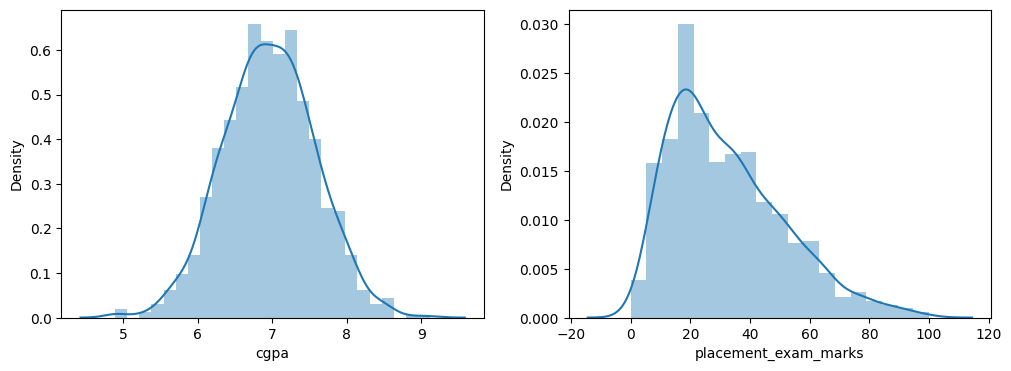

In [11]:
plt.figure(figsize= (12, 4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

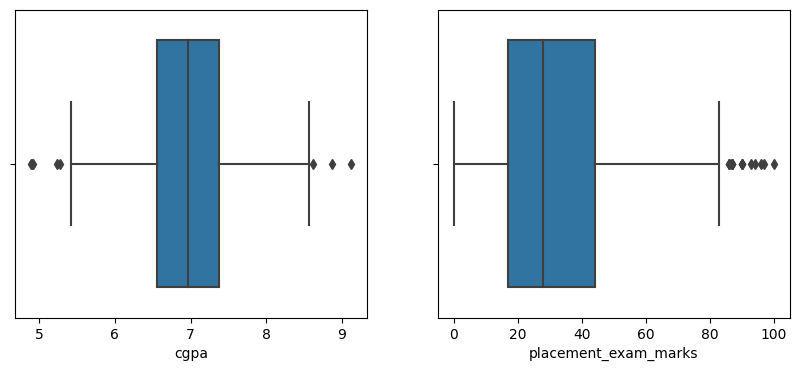

In [12]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
sns.boxplot(x= df['cgpa'])

plt.subplot(1,2,2)
sns.boxplot(x= df['placement_exam_marks'])

plt.show()

In [13]:
print('Mean value count', df['cgpa'].mean())
print('Std value count', df['cgpa'].std())
print('Max value count', df['cgpa'].max())
print('Min value count', df['cgpa'].min())

Mean value count 6.96124
Std value count 0.6158978751323894
Max value count 9.12
Min value count 4.89


In [14]:
#capping
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

In [15]:
upper_limit

8.808933625397168

In [16]:
df['cgpa']= np.where(
    df['cgpa']> upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [17]:
df.shape

(1000, 3)

In [18]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

<Axes: xlabel='cgpa'>

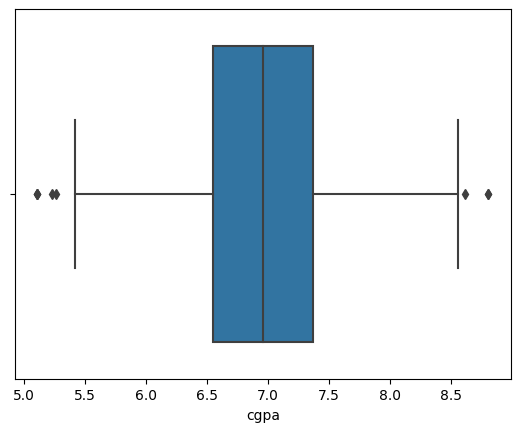

In [19]:
sns.boxplot(x= df['cgpa'])

In [20]:
# Finding the IQR
percentile25 = df['cgpa'].quantile(0.25)
percentile75 = df['cgpa'].quantile(0.75)

In [21]:
percentile75

7.37

In [22]:
IQR= percentile75 - percentile25

In [23]:
IQR

0.8200000000000003

<Axes: xlabel='cgpa'>

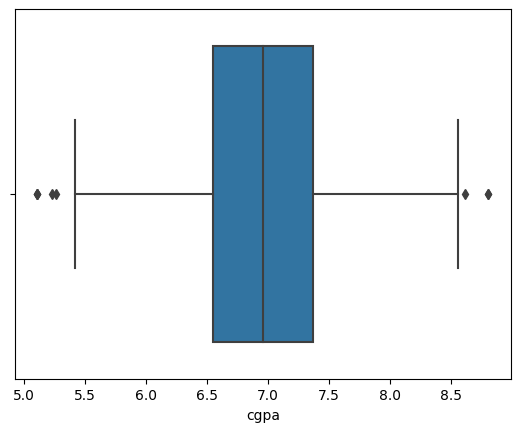

In [24]:
sns.boxplot(x= df['cgpa'])

In [25]:
df['cgpa'].max()

8.808933625397168